## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import random as rd

import warnings
import random
import pickle
from tqdm import tqdm

warnings.filterwarnings('ignore')

# 2 Exploratory data analysis.

In [2]:
movies_data = pd.read_csv("Dataset\movies.csv")
print("The size of dataset is", movies_data.shape)
movies_data.head()

The size of dataset is (87585, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


**Let's extract the year from the "title"**

In [4]:
movies_data["year_shot"] = movies_data["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)+$", x)))
movies_data.head()

,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [5]:
movies_data[movies_data["year_shot"] == ""]
print("-------")
print("The number with blanks in 'year' -", len(movies_data[movies_data["year_shot"] == ""]))

-------
The number with blanks in 'year' - 770


In [6]:
mask = movies_data["year_shot"] == ""
movies_data.loc[mask, "year_shot"] = movies_data[mask]["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)", x)))

In [7]:
movies_data[movies_data["year_shot"] == ""]
print("-------")
print("The number with blanks in 'year' -", len(movies_data[movies_data["year_shot"] == ""]))

-------


The number with blanks in 'year' - 615


In [8]:
movies_data.loc[movies_data["year_shot"] == "", "year_shot"] = np.nan

In [9]:
movies_data[movies_data["year_shot"].isna()]

,movieId,title,genres,year_shot
15038,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
25425,123619,Terrible Joe Moran,(no genres listed),NaN
26356,125571,The Court-Martial of Jackie Robinson,(no genres listed),NaN
26381,125632,In Our Garden,(no genres listed),NaN
26466,125958,Stephen Fry In America - New World,(no genres listed),NaN
...,...,...,...,...
86528,288927,Fortunes,Comedy,NaN
86634,289193,The Wonderful Story of Henry Sugar,Adventure|Children|Comedy,NaN
86833,289909,Rattler,(no genres listed),NaN
87074,290775,Being Romanian: A Family Journal,(no genres listed),NaN


**We see that there are some blanks in "year". I'll delete these rows as their amount is not huge.**

In [10]:
# convert "year" to numeric
mask1 = (~movies_data["year_shot"].isna())
movies_data.loc[mask1, "year_shot"] = movies_data.loc[mask1, "year_shot"].astype(int)

year_shot
1874    Axes(0.125,0.11;0.775x0.77)
1878    Axes(0.125,0.11;0.775x0.77)
1880    Axes(0.125,0.11;0.775x0.77)
1882    Axes(0.125,0.11;0.775x0.77)
1883    Axes(0.125,0.11;0.775x0.77)
                   ...             
2019    Axes(0.125,0.11;0.775x0.77)
2020    Axes(0.125,0.11;0.775x0.77)
2021    Axes(0.125,0.11;0.775x0.77)
2022    Axes(0.125,0.11;0.775x0.77)
2023    Axes(0.125,0.11;0.775x0.77)
Name: year_shot, Length: 142, dtype: object

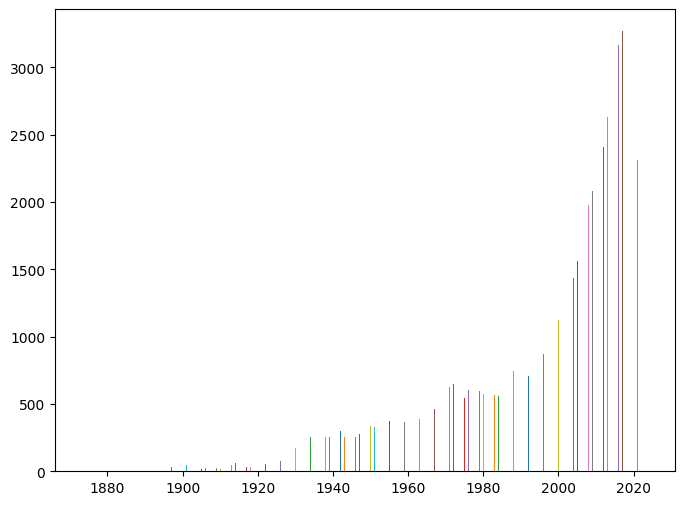

In [11]:
movies_data.groupby("year_shot")["year_shot"].hist(grid=False ,figsize=(8, 6))

In [12]:
movies_data.head()

,movieId,title,genres,year_shot
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [13]:
movies_data.dropna(subset='year_shot', inplace=True)

## 2.2 dataset with information about ratings


In [14]:
ratings_data = pd.read_csv("Dataset/ratings.csv")
print("The size of dataset is", ratings_data.shape)
ratings_data.head()

The size of dataset is (32000204, 4)


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [15]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [16]:
ratings_data.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [17]:
# Let's have a look at the unique number of users
ratings_data[["userId"]].nunique() 

userId    200948
dtype: int64

<Axes: >

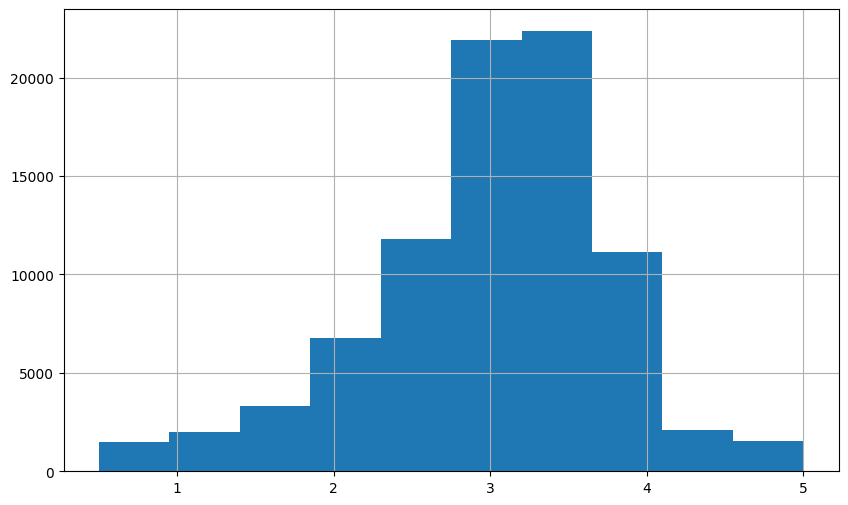

In [18]:
# distribution of mean rating
ratings_data.groupby("movieId").rating.mean().hist(figsize=(10, 6)) 

In [19]:
merged_df = movies_data.merge(ratings_data, on='movieId', how='inner')

In [20]:
merged_df

,movieId,title,genres,year_shot,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,10,2.5,1169265231
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,11,3.0,850085076
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17,4.0,1027305751
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,19,3.0,974704488
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,20,5.0,1553184230
...,...,...,...,...,...,...,...
31965046,292731,The Monroy Affaire (2022),Drama,2022,50685,4.0,1697074779
31965047,292737,Shelter in Solitude (2023),Comedy|Drama,2023,165364,1.5,1697145947
31965048,292753,Orca (2023),Drama,2023,150812,4.0,1697140530
31965049,292755,The Angry Breed (1968),Drama,1968,91097,1.0,1697144928


## Dataset with info about tags

In [21]:
tags = pd.read_csv('Dataset/tags.csv')

In [22]:
tags

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


In [23]:
final_df = merged_df.merge(tags, on=['movieId', 'userId' ], how='inner')

In [24]:
final_df

,movieId,title,genres,year_shot,userId,rating,timestamp_x,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,children,1257988285
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,Disney,1257988287
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,animation,1248249498
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,children,1248249511
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,Disney,1248249494
...,...,...,...,...,...,...,...,...,...
1433971,292143,La substància (2016),(no genres listed),2016,147560,2.5,1696549907,village,1696549986
1433972,292143,La substància (2016),(no genres listed),2016,147560,2.5,1696549907,Xiamen,1696549920
1433973,292349,Totally Killer (2023),Comedy|Horror,2023,139166,4.0,1696886809,politically incorrect,1696886847
1433974,292371,Pet Sematary: Bloodlines (2023),Fantasy|Horror,2023,108412,3.5,1696824748,Stephen King,1696824761


In [25]:
final_df["genres_list"] = final_df["genres"].str.split("|")
final_df.head()

,movieId,title,genres,year_shot,userId,rating,timestamp_x,tag,timestamp_y,genres_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,children,1257988285,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,Disney,1257988287,"[Adventure, Animation, Children, Comedy, Fantasy]"
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,animation,1248249498,"[Adventure, Animation, Children, Comedy, Fantasy]"
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,children,1248249511,"[Adventure, Animation, Children, Comedy, Fantasy]"
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,Disney,1248249494,"[Adventure, Animation, Children, Comedy, Fantasy]"


In [26]:
from sklearn.preprocessing import MultiLabelBinarizer
# for exploding lists we will use MultiLabelBinarizer()
# convert the "genres_list columns" to pd.Series in order to extract genres from the lists to seperate columns
genres_list_to_series = pd.Series(final_df.genres_list)
m1b = MultiLabelBinarizer()
one_hot_genres = pd.DataFrame(m1b.fit_transform(genres_list_to_series), columns=m1b.classes_)
one_hot_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
final_df = pd.concat([final_df.reset_index(drop=True), one_hot_genres.reset_index(drop=True)], axis=1)
final_df.head()

,movieId,title,genres,year_shot,userId,rating,timestamp_x,tag,timestamp_y,genres_list,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,children,1257988285,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,Disney,1257988287,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,animation,1248249498,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,children,1248249511,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,Disney,1248249494,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,0


In [28]:
import pickle
from sklearn.preprocessing import LabelEncoder
# Initialize and fit the encoder
label_encoder = LabelEncoder()
final_df['tag_encoded'] = label_encoder.fit_transform(final_df['tag'].str.lower())

# Save encoder
with open('tag_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [29]:
final_df

,movieId,title,genres,year_shot,userId,rating,timestamp_x,tag,timestamp_y,genres_list,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tag_encoded
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,children,1257988285,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,15589
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,109,4.0,1254982916,Disney,1257988287,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,23387
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,animation,1248249498,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,4215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,children,1248249511,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,15589
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,909,2.0,1503218498,Disney,1248249494,"[Adventure, Animation, Children, Comedy, Fantasy]",...,0,0,0,0,0,0,0,0,0,23387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433971,292143,La substància (2016),(no genres listed),2016,147560,2.5,1696549907,village,1696549986,[(no genres listed)],...,0,0,0,0,0,0,0,0,0,89821
1433972,292143,La substància (2016),(no genres listed),2016,147560,2.5,1696549907,Xiamen,1696549920,[(no genres listed)],...,0,0,0,0,0,0,0,0,0,94533
1433973,292349,Totally Killer (2023),Comedy|Horror,2023,139166,4.0,1696886809,politically incorrect,1696886847,"[Comedy, Horror]",...,1,0,0,0,0,0,0,0,0,63038
1433974,292371,Pet Sematary: Bloodlines (2023),Fantasy|Horror,2023,108412,3.5,1696824748,Stephen King,1696824761,"[Fantasy, Horror]",...,1,0,0,0,0,0,0,0,0,80358


In [30]:
final_df.columns

Index(['movieId', 'title', 'genres', 'year_shot', 'userId', 'rating',
       'timestamp_x', 'tag', 'timestamp_y', 'genres_list',
       '(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'tag_encoded'],
      dtype='object')

In [31]:
final_df.drop(columns=['timestamp_x', 'timestamp_y', 'genres', 'tag', 'genres_list'], inplace=True)

In [32]:
final_df

,movieId,title,year_shot,userId,rating,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tag_encoded
0,1,Toy Story (1995),1995,109,4.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,15589
1,1,Toy Story (1995),1995,109,4.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,23387
2,1,Toy Story (1995),1995,909,2.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,4215
3,1,Toy Story (1995),1995,909,2.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,15589
4,1,Toy Story (1995),1995,909,2.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,23387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433971,292143,La substància (2016),2016,147560,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,89821
1433972,292143,La substància (2016),2016,147560,2.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,94533
1433973,292349,Totally Killer (2023),2023,139166,4.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,63038
1433974,292371,Pet Sematary: Bloodlines (2023),2023,108412,3.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,80358


In [33]:
final_df['rating'].value_counts()

rating
4.0    308672
5.0    258390
3.5    231175
4.5    215334
3.0    164353
2.5     83809
2.0     63364
1.0     46899
1.5     35396
0.5     26584
Name: count, dtype: int64

In [34]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Calculate the difference
final_df['year_diff'] = (current_year - final_df['year_shot'])
final_df.drop(columns=['year_shot'], inplace=True)

In [35]:
final_df

,movieId,title,userId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tag_encoded,year_diff
0,1,Toy Story (1995),109,4.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,15589,30
1,1,Toy Story (1995),109,4.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,23387,30
2,1,Toy Story (1995),909,2.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,4215,30
3,1,Toy Story (1995),909,2.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,15589,30
4,1,Toy Story (1995),909,2.0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,23387,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433971,292143,La substància (2016),147560,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,89821,9
1433972,292143,La substància (2016),147560,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,94533,9
1433973,292349,Totally Killer (2023),139166,4.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,63038,2
1433974,292371,Pet Sematary: Bloodlines (2023),108412,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,80358,2


In [36]:
from sklearn.model_selection import train_test_split

# Example dataset (X: features, y: target variable)
X = final_df.drop(columns=['rating', 'title', 'userId', 'movieId'])
y = final_df['rating']

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print shapes of splits
print(f"X_train shape: {len(X_train)}, X_test shape: {len(X_test)}")
print(f"y_train shape: {len(y_train)}, y_test shape: {len(y_test)}")


X_train shape: 1147180, X_test shape: 286796
y_train shape: 1147180, y_test shape: 286796


10


  File "e:\Hustle\Movie Lens\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Mrstu\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mrstu\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^

11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


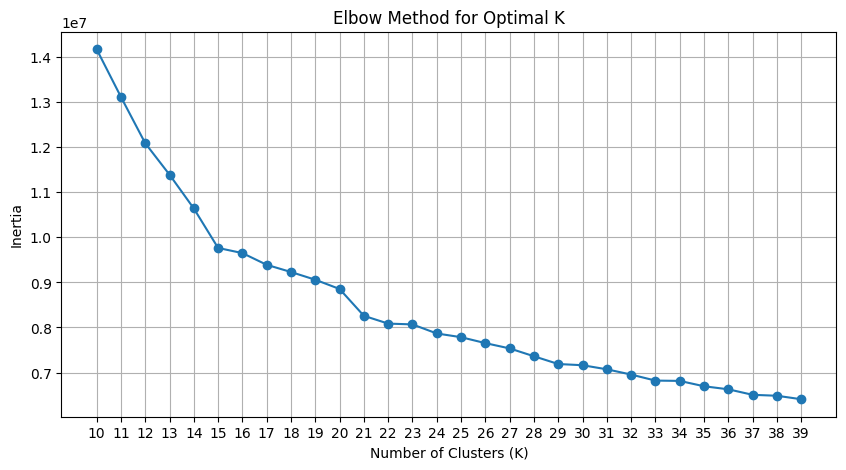

Cluster
0    241176
5    219008
2    211080
4    136228
1    132541
6    109907
3     64609
8     14286
9     12498
7      5847
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from joblib import parallel_backend


# Standardize the features for better clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_train)

# Define K range
K_range = range(10, 40)
inertia = []

# Train KMeans for different values of K
with parallel_backend('loky', n_jobs=6):  # Explicitly use 6 cores
    for k in K_range:
        print(k)
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init="auto", random_state=42, tol=1e-4)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)  # Store inertia (sum of squared distances)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()



In [65]:
# Choose the optimal K (manual selection after checking the plot)
optimal_k =500  # Change based on elbow method result

# Train final KMeans model
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init="auto", random_state=42, tol=1e-4)
X_train['Cluster'] = kmeans_final.fit_predict(df_scaled)

# Display cluster counts
print(X_train['Cluster'].value_counts())


Cluster
153    16257
178    15909
29     13490
283    10369
15      9631
       ...  
79       124
373      114
90        60
419       48
14        36
Name: count, Length: 500, dtype: int64


In [66]:
kuch = pd.concat([X_train, y_train], axis=1)

In [67]:
kuch

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,tag_encoded,year_diff,Cluster,rating
1214777,0,1,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,72189,9,93,3.0
1185866,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,71400,13,29,0.5
1231356,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,28638,37,352,2.0
1099125,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,82151,11,4,4.0
727356,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,37749,18,393,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,43787,39,434,4.0
1414414,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,7935,3,304,3.5
131932,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,7693,50,91,4.0
671155,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,80330,20,16,5.0


In [68]:
ratings = {}
for cluster in range(0,500):
    sample = kuch[kuch['Cluster']==cluster]
    mean_rate = sample['rating'].mean()
    median_rate = sample['rating'].median()
    ratings[cluster] = [mean_rate, median_rate]


In [69]:
ratings

{0: [np.float64(3.8127049180327868), np.float64(4.0)],
 1: [np.float64(3.8697092935683086), np.float64(4.0)],
 2: [np.float64(3.6448305821025198), np.float64(4.0)],
 3: [np.float64(2.9989239598278337), np.float64(3.0)],
 4: [np.float64(3.7251109262340543), np.float64(4.0)],
 5: [np.float64(4.171208791208791), np.float64(4.5)],
 6: [np.float64(3.4921444768383543), np.float64(3.5)],
 7: [np.float64(2.9578369905956112), np.float64(3.0)],
 8: [np.float64(3.8015151515151517), np.float64(4.0)],
 9: [np.float64(3.3852917665867306), np.float64(3.5)],
 10: [np.float64(3.932903918411165), np.float64(4.0)],
 11: [np.float64(4.02287716405606), np.float64(4.5)],
 12: [np.float64(4.330457863304579), np.float64(4.5)],
 13: [np.float64(3.429017517136329), np.float64(3.5)],
 14: [np.float64(3.7916666666666665), np.float64(4.0)],
 15: [np.float64(3.8683418128958573), np.float64(4.0)],
 16: [np.float64(3.459165687426557), np.float64(3.5)],
 17: [np.float64(3.6373483535528597), np.float64(4.0)],
 18: [np.

In [70]:
test_scaled = scaler.transform(X_test)
cluster_predicted = kmeans_final.predict(test_scaled)

In [74]:
test = pd.DataFrame({'predictions':cluster_predicted, 'ratings': y_test})

In [79]:
test['pred'] = test['predictions'].apply(lambda x: ratings[x][1])

In [80]:
test

,predictions,ratings,pred
631005,446,1.0,4.0
1281317,476,4.5,3.5
1226896,484,0.5,4.0
984640,87,5.0,4.0
1036479,98,4.0,4.0
...,...,...,...
792134,192,5.0,4.0
1266772,313,2.5,3.0
92322,113,4.0,4.0
268047,249,3.0,3.0


In [82]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test["ratings"], test["pred"]))
print(f"RMSE: {rmse:.4f}")

RMSE: 1.0845


In [83]:
from sklearn.metrics import mean_absolute_error

# Compute MAE
mae = mean_absolute_error(test["ratings"], test["pred"])
print(f"MAE: {mae:.4f}")


MAE: 0.7979


## Done and dusted

(no genres listed)     int64
Action                 int64
Adventure              int64
Animation              int64
Children               int64
Comedy                 int64
Crime                  int64
Documentary            int64
Drama                  int64
Fantasy                int64
Film-Noir              int64
Horror                 int64
IMAX                   int64
Musical                int64
Mystery                int64
Romance                int64
Sci-Fi                 int64
Thriller               int64
War                    int64
Western                int64
tag_encoded            int64
year_diff             object
Cluster                int32
dtype: object

## Let's moove on towards the Neural net Part:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Sample Hyperparameters
input_size = 22  # Number of features
num_classes = 10  # Adjust based on your dataset
learning_rate = 0.001
epochs = 50
batch_size = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Sample Neural Network
class MultiClassNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, num_classes)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # No softmax, as CrossEntropyLoss includes it
        return x

X_train['year_diff'] = X_train['year_diff'].astype(float)
X_test['year_diff'] = X_test['year_diff'].astype(float)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.drop(columns='Cluster').values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.drop(columns='Cluster').values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize model, loss, and optimizer
model = MultiClassNN(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Save the trained model
torch.save(model.state_dict(), "multiclass_nn.pth")
print("Model saved successfully.")


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.